### Imported libreries

In [2]:
# Data manipulation

import pandas as pd
import numpy as np

# Modeling

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import matplotlib.pyplot as plt

### Selection of the best dataset

In [3]:
X_train_WITH_outliers = pd.read_excel("../data/processed/X_train_WITH_outliers.xlsx")
X_train_WITH_outliers_norm = pd.read_excel("../data/processed/X_train_WITH_outliers_norm.xlsx")
X_train_WITH_outliers_scal = pd.read_excel("../data/processed/X_train_WITH_outliers_scal.xlsx")
X_train_WITHOUT_outliers = pd.read_excel("../data/processed/X_train_WITHOUT_outliers.xlsx")
X_train_WITHOUT_outliers_norm = pd.read_excel("../data/processed/X_train_WITHOUT_outliers_norm.xlsx")
X_train_WITHOUT_outliers_scal = pd.read_excel("../data/processed/X_train_WITHOUT_outliers_scal.xlsx")

X_test_WITH_outliers = pd.read_excel("../data/processed/X_test_WITH_outliers.xlsx")
X_test_WITH_outliers_norm = pd.read_excel("../data/processed/X_test_WITH_outliers_norm.xlsx")
X_test_WITH_outliers_scal = pd.read_excel("../data/processed/X_test_WITH_outliers_scal.xlsx")
X_test_WITHOUT_outliers = pd.read_excel("../data/processed/X_test_WITHOUT_outliers.xlsx")
X_test_WITHOUT_outliers_norm = pd.read_excel("../data/processed/X_test_WITHOUT_outliers_norm.xlsx")
X_test_WITHOUT_outliers_scal = pd.read_excel("../data/processed/X_test_WITHOUT_outliers_scal.xlsx")


y_train = pd.read_excel("../data/processed/y_train.xlsx")
y_test = pd.read_excel("../data/processed/y_test.xlsx")

In [25]:
train_datasets = {
    "WITH_outliers": X_train_WITH_outliers,
    "WITH_outliers_norm": X_train_WITH_outliers_norm,
    "WITH_outliers_scal": X_train_WITH_outliers_scal,
    "WITHOUT_outliers": X_train_WITHOUT_outliers,
    "WITHOUT_outliers_norm": X_train_WITHOUT_outliers_norm,
    "WITHOUT_outliers_scal": X_train_WITHOUT_outliers_scal
}

test_datasets = {
    "WITH_outliers": X_test_WITH_outliers,
    "WITH_outliers_norm": X_test_WITH_outliers_norm,
    "WITH_outliers_scal": X_test_WITH_outliers_scal,
    "WITHOUT_outliers": X_test_WITHOUT_outliers,
    "WITHOUT_outliers_norm": X_test_WITHOUT_outliers_norm,
    "WITHOUT_outliers_scal": X_test_WITHOUT_outliers_scal
}

models = {}
metrics = {}

for name, X_train  in train_datasets.items():
    X_test = test_datasets[name]
    model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    models[name] = model
    metrics[name] = {
        "Accuracy": acc,
        "F1": f1,
        "Precision": prec,
        "Recall": rec,
        "Confusion_Matrix": cm
    }

    print(
        f"{name}: "
        f"Accuracy={acc:.4f}, "
        f"F1={f1:.4f}, "
        f"Precision={prec:.4f}, "
        f"Recall={rec:.4f}"
    )
    print("Confusion Matrix:\n", cm)
    print("-" * 50)

    
best_dataset_name = max(metrics, key=lambda k: metrics[k]["Accuracy"])
best_model = models[best_dataset_name]
best_X_train = train_datasets[best_dataset_name]
best_X_test = test_datasets[best_dataset_name]


print("\n================ CONCLUSION ================")
print(f"Best dataset: {best_dataset_name}")
print(f"Accuracy: {metrics[best_dataset_name]['Accuracy']:.4f}")
print(f"F1-score: {metrics[best_dataset_name]['F1']:.4f}")
print(f"Precision: {metrics[best_dataset_name]['Precision']:.4f}")
print(f"Recall: {metrics[best_dataset_name]['Recall']:.4f}")

/workspaces/Tutorial-del-proyecto-de-rbol-de-decisi-n-Guillermo3dam/.venv/lib/python3.12/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


WITH_outliers: Accuracy=0.7727, F1=0.6392, Precision=0.8158, Recall=0.5254
Confusion Matrix:
 [[88  7]
 [28 31]]
--------------------------------------------------


/workspaces/Tutorial-del-proyecto-de-rbol-de-decisi-n-Guillermo3dam/.venv/lib/python3.12/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


WITH_outliers_norm: Accuracy=0.7727, F1=0.6392, Precision=0.8158, Recall=0.5254
Confusion Matrix:
 [[88  7]
 [28 31]]
--------------------------------------------------
WITH_outliers_scal: Accuracy=0.7727, F1=0.6392, Precision=0.8158, Recall=0.5254
Confusion Matrix:
 [[88  7]
 [28 31]]
--------------------------------------------------


/workspaces/Tutorial-del-proyecto-de-rbol-de-decisi-n-Guillermo3dam/.venv/lib/python3.12/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/workspaces/Tutorial-del-proyecto-de-rbol-de-decisi-n-Guillermo3dam/.venv/lib/python3.12/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


WITHOUT_outliers: Accuracy=0.7792, F1=0.6531, Precision=0.8205, Recall=0.5424
Confusion Matrix:
 [[88  7]
 [27 32]]
--------------------------------------------------
WITHOUT_outliers_norm: Accuracy=0.7792, F1=0.6531, Precision=0.8205, Recall=0.5424
Confusion Matrix:
 [[88  7]
 [27 32]]
--------------------------------------------------


/workspaces/Tutorial-del-proyecto-de-rbol-de-decisi-n-Guillermo3dam/.venv/lib/python3.12/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/workspaces/Tutorial-del-proyecto-de-rbol-de-decisi-n-Guillermo3dam/.venv/lib/python3.12/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


WITHOUT_outliers_scal: Accuracy=0.7792, F1=0.6531, Precision=0.8205, Recall=0.5424
Confusion Matrix:
 [[88  7]
 [27 32]]
--------------------------------------------------

================ CONCLUSION ================
Best dataset: WITHOUT_outliers
Accuracy: 0.7792
F1-score: 0.6531
Precision: 0.8205
Recall: 0.5424


We have increased the model's accuracy by 0.0519, which represents 7.13%.

In [34]:
n_estimators = [50, 100, 200, 300, 500]
bootstrap_list = [True, False]

results = []

for name, X_train in train_datasets.items():
    X_test = test_datasets[name]
    
    for n in n_estimators:
        for boot in bootstrap_list:
            model = RandomForestClassifier(
                n_estimators=n,
                bootstrap=boot,
                random_state=17
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            results.append({
                "dataset": name,
                "n_estimators": n,
                "bootstrap": boot,
                "accuracy": accuracy_score(y_test, y_pred),
                "f1": f1_score(y_test, y_pred),
                "precision": precision_score(y_test, y_pred),
                "recall": recall_score(y_test, y_pred),
                "model": model
            })

best = None

for r in results:
    if best is None or r["accuracy"] > best["accuracy"]:
        best = r

print(f"Best dataset: {best['dataset']}")
print(f"n_estimators: {best['n_estimators']}")
print(f"bootstrap: {best['bootstrap']}")
print(f"Accuracy: {best['accuracy']:.4f}")
print(f"F1-score: {best['f1']:.4f}")
print(f"Precision: {best['precision']:.4f}")
print(f"Recall: {best['recall']:.4f}")

/workspaces/Tutorial-del-proyecto-de-rbol-de-decisi-n-Guillermo3dam/.venv/lib/python3.12/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/workspaces/Tutorial-del-proyecto-de-rbol-de-decisi-n-Guillermo3dam/.venv/lib/python3.12/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/workspaces/Tutorial-del-proyecto-de-rbol-de-decisi-n-Guillermo3dam/.venv/lib/python3.12/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/workspaces/Tuto

Best dataset: WITHOUT_outliers_norm
n_estimators: 100
bootstrap: False
Accuracy: 0.7792
F1-score: 0.6531
Precision: 0.8205
Recall: 0.5424


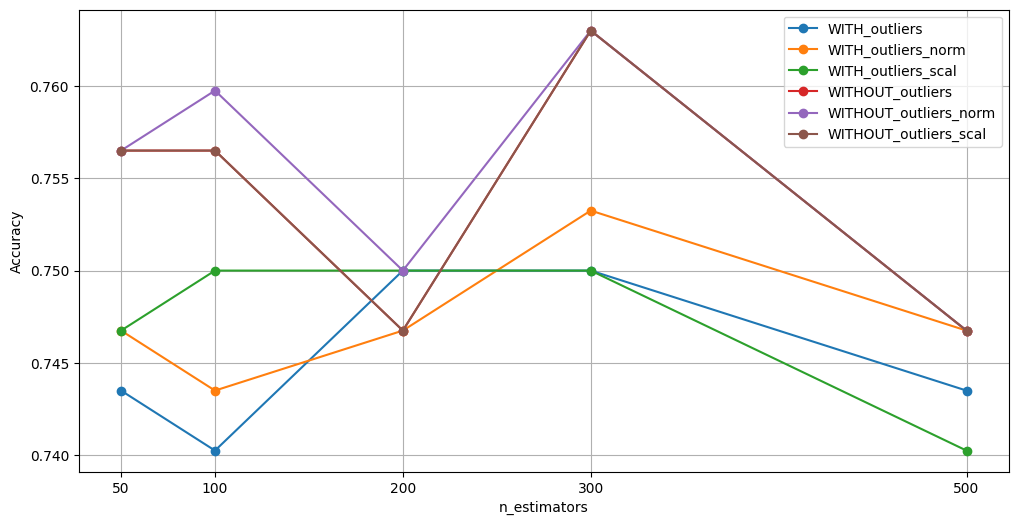

In [38]:
df_results = pd.DataFrame(results)

plt.figure(figsize=(12, 6))

for dataset_name in df_results['dataset'].unique():
    df_subset = df_results[df_results['dataset'] == dataset_name]
    df_plot = df_subset.groupby('n_estimators')['accuracy'].mean().reset_index()
    
    plt.plot(df_plot['n_estimators'], df_plot['accuracy'], marker='o', label=dataset_name)

plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.xticks(n_estimators)
plt.grid(True)
plt.legend()
plt.show()